# **Modulos y librerias necesarios**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
path=os.path.join("..","data", "raw", "telco_churn.csv")
df=pd.read_csv(path, delimiter=",")

In [3]:
df=df.drop(columns=['customerID'])

Eliminamos `customerID` de la tabla dado que no es necesario para el análisis.

In [4]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype(int)

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', np.nan), errors='coerce')

In [6]:
df.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


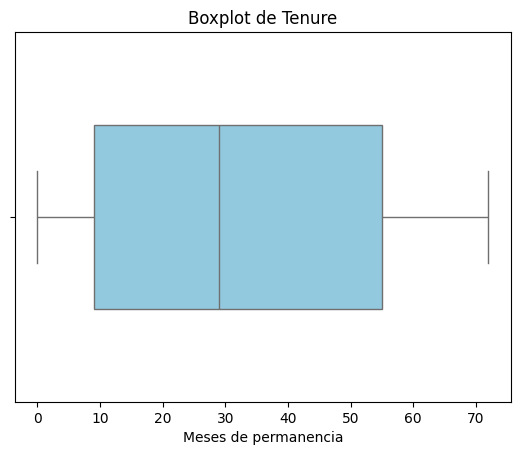

In [26]:
sns.boxplot(df['tenure'], orient='h', color='skyblue', width=0.5, fliersize=3)
plt.title('Boxplot de Tenure')
plt.xlabel('Meses de permanencia')
plt.show()

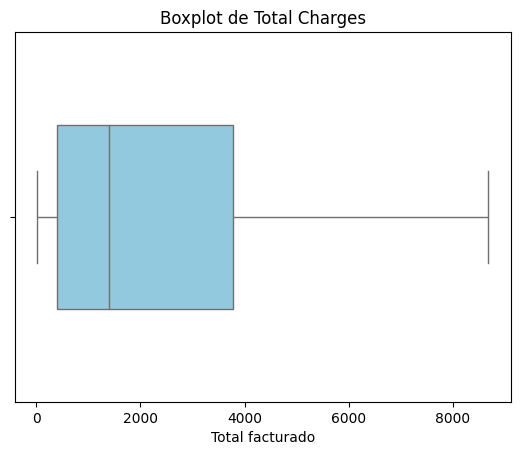

In [27]:
sns.boxplot(df['TotalCharges'], orient='h', color='skyblue', width=0.5, fliersize=3)
plt.title('Boxplot de Total Charges')
plt.xlabel('Total facturado')
plt.show()


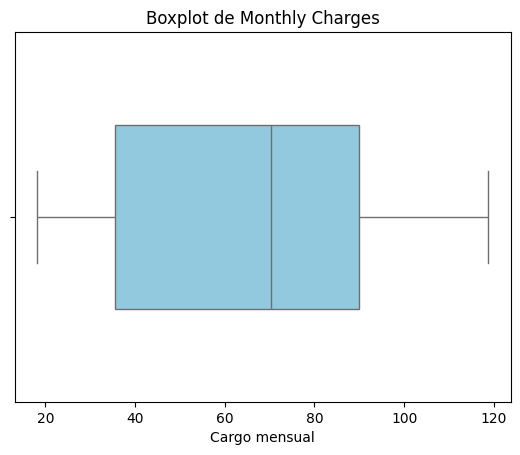

In [29]:
sns.boxplot(df['MonthlyCharges'], orient='h', color='skyblue', width=0.5, fliersize=3)
plt.title('Boxplot de Monthly Charges')
plt.xlabel('Cargo mensual')
plt.show()

Las variables numericas `tenure`, `MonthlyCharges` y `TotalCharges` no presentan valores atípicos significativos, como se observa en los boxplots a continuación. Por lo tanto, no es necesario aplicar técnicas de tratamiento de outliers en este caso.

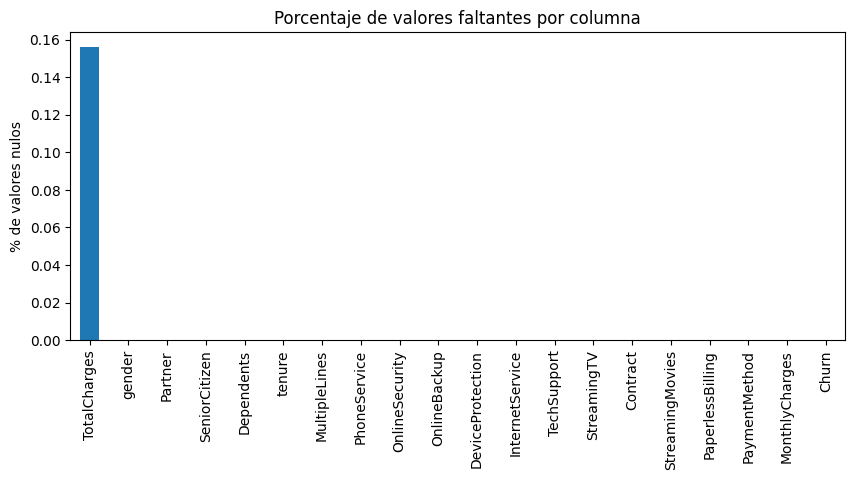

In [7]:
(df.isna().mean() * 100).sort_values(ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('% de valores nulos')
plt.title('Porcentaje de valores faltantes por columna')
plt.show()


La variable `TotalCharges` cuenta con una 0.16% de valores faltantes, los cuales serán imputados.

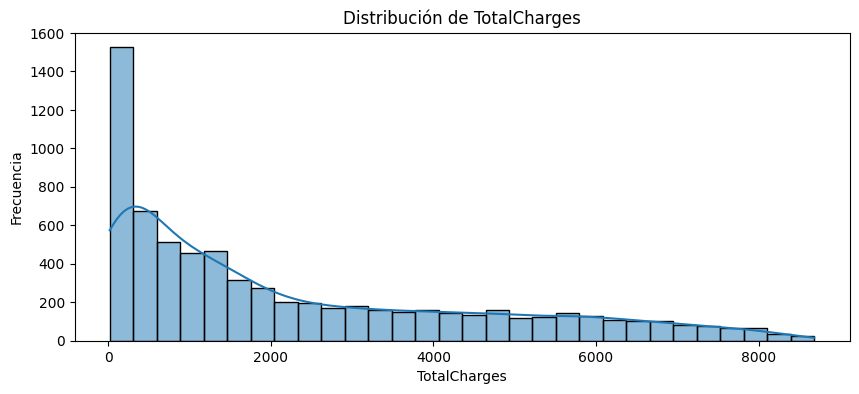

In [17]:
# histograma de TotalCharges
plt.figure(figsize=(10, 4))
sns.histplot(df['TotalCharges'].dropna(), bins=30, kde=True)
plt.title('Distribución de TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
# prueba de normalidad TotalCharges con Kolmogorov-Smirnov
from scipy import stats
statistic, p_value = stats.kstest(df['TotalCharges'].dropna(), 'norm', args=(df['TotalCharges'].mean(), df['TotalCharges'].std()))
print(f"KS Statistic: {statistic}, P-value: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No rechazamos la hipótesis nula: Los datos siguen una distribución normal.")

KS Statistic: 0.15889778904993312, P-value: 1.4678016400350705e-155
Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.


Como la variable `TotalCharges` no sigue una distribución normal, se opta por imputar los valores faltantes con la mediana de la variable.

In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"{column}: {df[column].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Se verifica que las categorías de las variables categóricas coincidan con las documentadas en el dataset original, en el link, [Data Card](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). Lo cual si se cumple.

# **Visualización de las variables**

In [11]:
cols_to_clean = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies'
]

for col in cols_to_clean:
    df[col] = df[col].replace({
        'No internet service': 'No',
        'No phone service': 'No'
    })

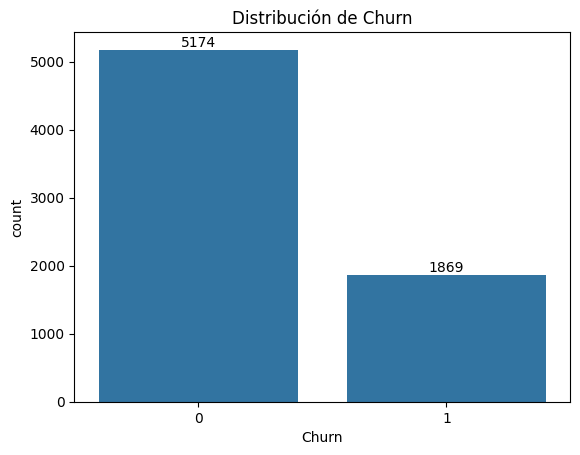

In [12]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title('Distribución de Churn') 
plt.show()

Como se observa en el grafico de barras, la mayoría de los clientes no han cancelado el servicio. Lo cual no indica que el dataset está desbalanceado.

In [13]:
def churn_rate_table(df, col):
    t = (df.groupby(col)['Churn']
           .agg(n='count', churn_rate='mean')
           .reset_index())
    t['churn_rate_pct'] = (t['churn_rate'] * 100)
    return t

def plot_counts_and_churn(df, col, top_k=None, rotate=0):
    """
    Dibuja una figura con 2 subplots:
      - Izq: conteo de categorías
      - Der: tasa de churn por categoría
    Parámetros:
      top_k: si se indica, muestra solo las top_k categorías más frecuentes.
    """
    # Orden por frecuencia
    freq = df[col].value_counts(dropna=False)
    order = freq.index.tolist()
    if top_k is not None:
        order = order[:top_k]

    # Tablas auxiliares filtradas al mismo orden
    t_counts = (df[col].value_counts().reindex(order).reset_index())
    t_counts.columns = [col, 'count']

    t_churn = churn_rate_table(df, col)
    t_churn = t_churn[t_churn[col].isin(order)].copy()
    t_churn[col] = pd.Categorical(t_churn[col], categories=order, ordered=True)
    t_churn = t_churn.sort_values(col)

    # Figura
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

    # ---- Izquierda: conteos
    sns.barplot(data=t_counts, x=col, y='count', ax=axes[0], order=order)
    axes[0].set_title(f'Distribución de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Conteo')
    axes[0].tick_params(axis='x', rotation=rotate)
    for c in axes[0].containers:
        axes[0].bar_label(c, padding=2, fmt='%d')

    # ---- Derecha: churn rate
    sns.barplot(data=t_churn, x=col, y='churn_rate', ax=axes[1], order=order)
    axes[1].set_title(f'Tasa de churn por {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Tasa de churn')
    axes[1].set_ylim(0, 1)
    axes[1].tick_params(axis='x', rotation=rotate)
    for p, v in zip(axes[1].patches, t_churn['churn_rate_pct']):
        axes[1].annotate(f'{v:.1f}%', (p.get_x()+p.get_width()/2, p.get_height()),
                         ha='center', va='bottom', xytext=(0,3), textcoords='offset points')

    plt.show()

def batch_plot_counts_and_churn(df, cols, max_plots=6, top_k=None, rotate=15):
    """
    Genera varias figuras (una por variable) con conteo y churn rate.
    - max_plots: límite de variables a graficar (para no saturar)
    - top_k: limita categorías por variable (más frecuentes)
    """
    for i, col in enumerate(cols[:max_plots], start=1):
        plot_counts_and_churn(df, col, top_k=top_k, rotate=rotate)


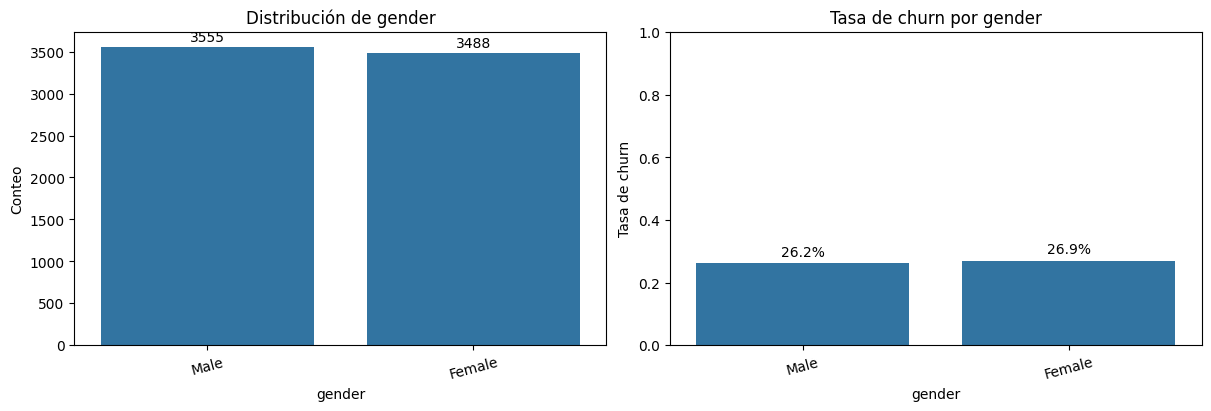

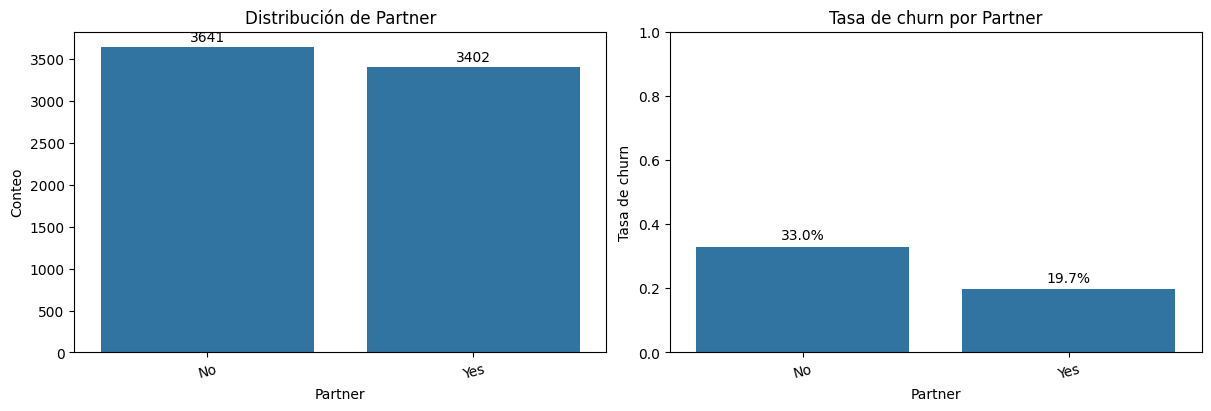

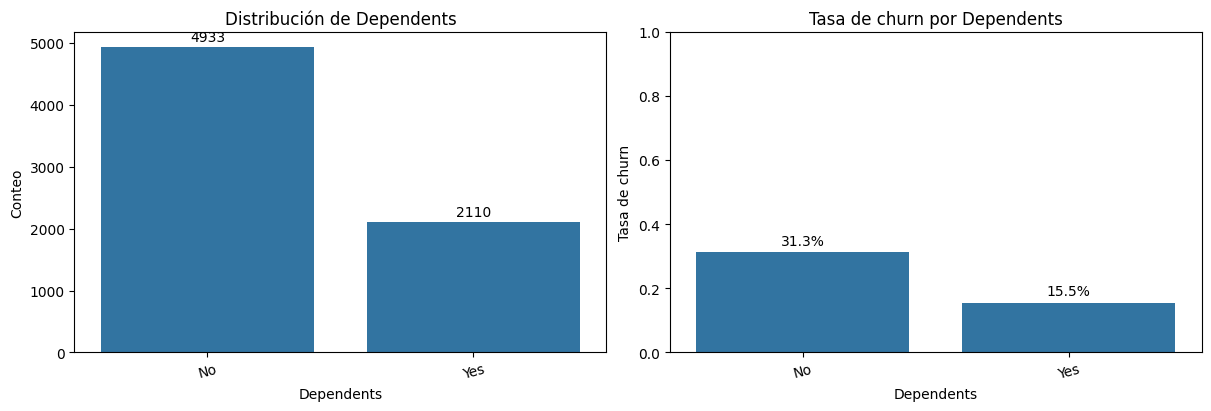

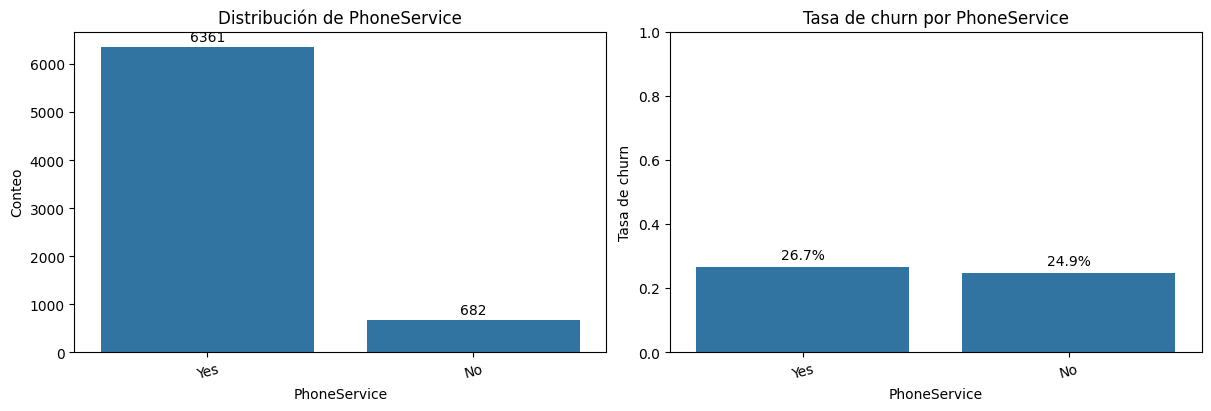

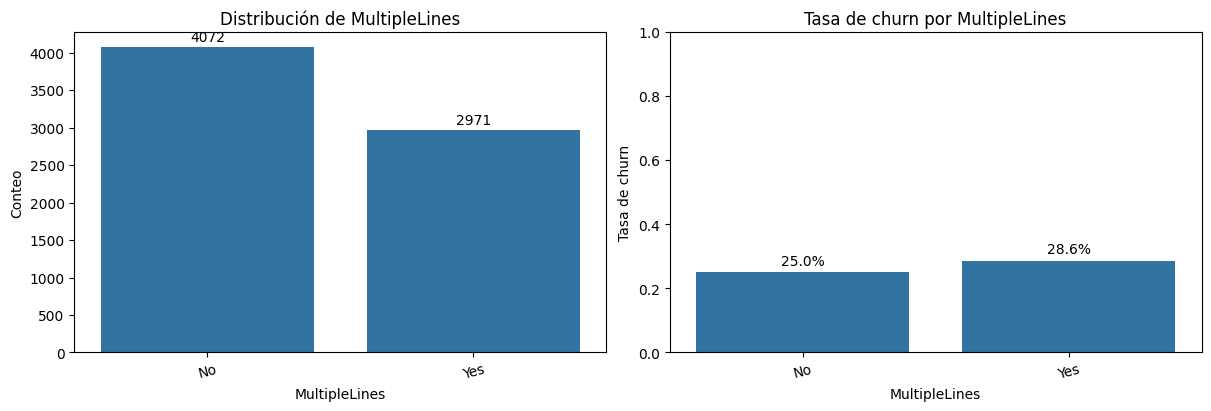

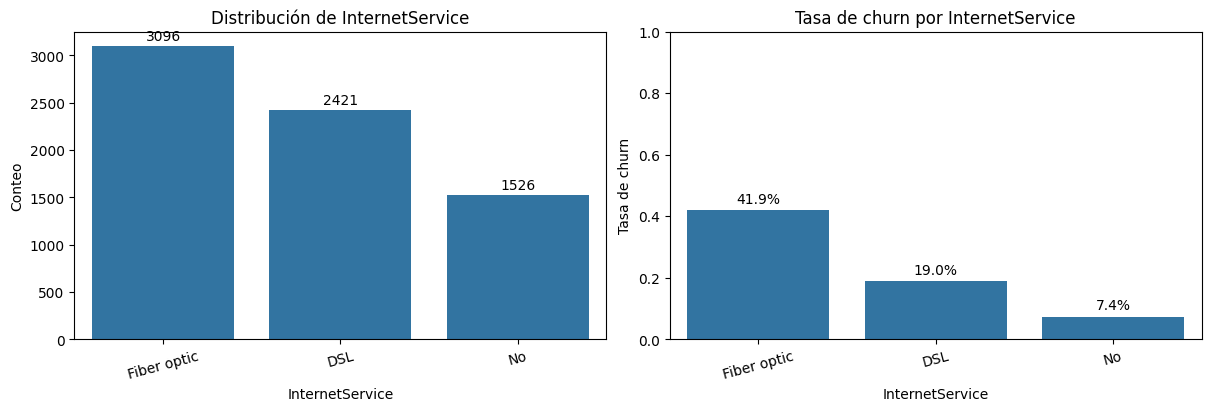

In [14]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
batch_plot_counts_and_churn(df, cat_cols, max_plots=6, top_k=3, rotate=15)

Las gráficas muestran la distribución general de los clientes y cómo varía la tasa de cancelación (churn) en cada grupo. En cuanto al género, la proporción de hombres y mujeres es similar, con tasas de churn casi iguales. En la variable `Partner`, los clientes sin pareja presentan una tasa de churn mayor que aquellos con pareja. En `Dependents`, se observa que quienes no tienen dependientes son mayoría y también tienen una tasa de churn más alta. La variable `PhoneService` está dominada por clientes que sí cuentan con el servicio, con tasas similares entre ambos grupos. En `MultipleLines`, las proporciones son equilibradas y la tasa de churn ligeramente mayor en quienes tienen líneas múltiples. Finalmente, en `InternetService`, la mayor parte de los clientes usa fibra óptica, seguida de DSL, y los que no tienen internet presentan la menor tasa de churn.


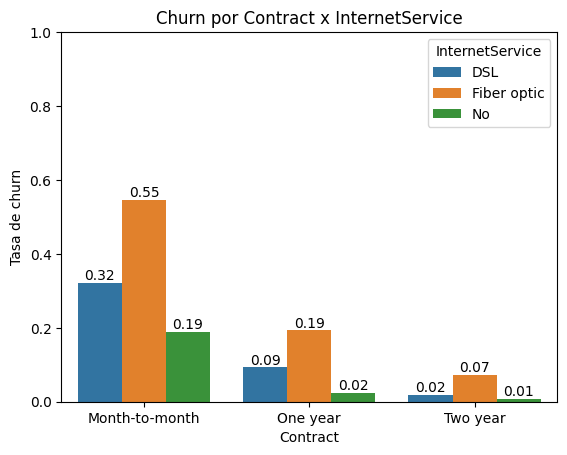

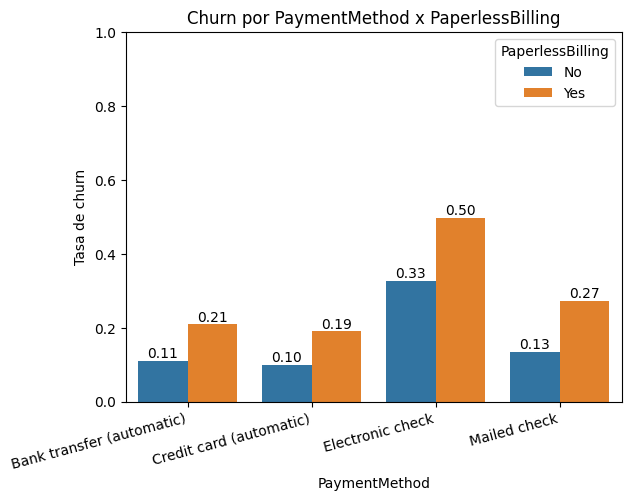

In [15]:
# Contract x InternetService -> tasa de churn
if 'Contract' in df.columns and 'InternetService' in df.columns:
    t = (df.groupby(['Contract','InternetService'])['Churn']
            .mean().reset_index())
    t['churn_rate_pct'] = (t['Churn']*100).round(1)
    ax = sns.barplot(data=t, x='Contract', y='Churn', hue='InternetService')
    ax.set_ylim(0,1)
    ax.set_ylabel('Tasa de churn')
    ax.set_title('Churn por Contract x InternetService')
    for c in ax.containers:
        ax.bar_label(c, fmt='%.2f')
    plt.show()

# PaymentMethod x PaperlessBilling -> tasa de churn
if 'PaymentMethod' in df.columns and 'PaperlessBilling' in df.columns:
    t2 = (df.groupby(['PaymentMethod','PaperlessBilling'])['Churn']
             .mean().reset_index())
    ax = sns.barplot(data=t2, x='PaymentMethod', y='Churn', hue='PaperlessBilling')
    ax.set_ylim(0,1)
    ax.set_ylabel('Tasa de churn')
    ax.set_title('Churn por PaymentMethod x PaperlessBilling')
    plt.xticks(rotation=15, ha='right')
    for c in ax.containers:
        ax.bar_label(c, fmt='%.2f')
    plt.show()

En las gráficas combinadas se observa cómo interactúan distintas variables con la tasa de cancelación de clientes. En la primera, que cruza `Contract` con `InternetService`, los contratos mensuales presentan las tasas de churn más altas, especialmente entre quienes tienen servicio de fibra óptica, mientras que los contratos de uno o dos años muestran una reducción clara del abandono. En la segunda gráfica, que compara `PaymentMethod` con `PaperlessBilling`, se nota que el método de pago electrónico mediante cheque y la facturación sin papel tienen las tasas de churn más elevadas, en contraste con los pagos automáticos por transferencia o tarjeta, que muestran una retención más alta.


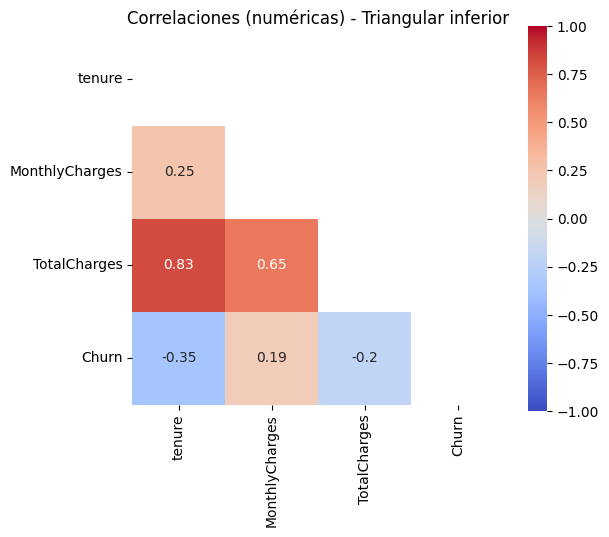

In [16]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr = df[num_cols].corr()

# Crear máscara para la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',  
    square=True
)
plt.title('Correlaciones (numéricas)')
plt.show()


El mapa de calor muestra las correlaciones entre las variables numéricas del conjunto de datos. Se observa una fuerte relación positiva entre `TotalCharges` y `tenure`, lo cual indica que a mayor tiempo de permanencia del cliente, mayor es el total facturado. También hay una correlación moderada entre `MonthlyCharges` y `TotalCharges`, ya que ambos reflejan aspectos del monto de pago. En cuanto al `Churn`, presenta correlaciones negativas con `tenure` y `TotalCharges`, sugiriendo que los clientes con más tiempo y mayor gasto total tienden a abandonar menos el servicio, mientras que `MonthlyCharges` tiene una relación ligeramente positiva con el churn.


In [ ]:
path=os.path.join("..","data", "processed", "telco_churn_cleaned.csv")
df.to_csv(path, index=False)